# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATA_PATH = Path('../data/')

## Options

In [3]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [11]:
n_models = 10
patience = 50
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [12]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [13]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 16.120s 


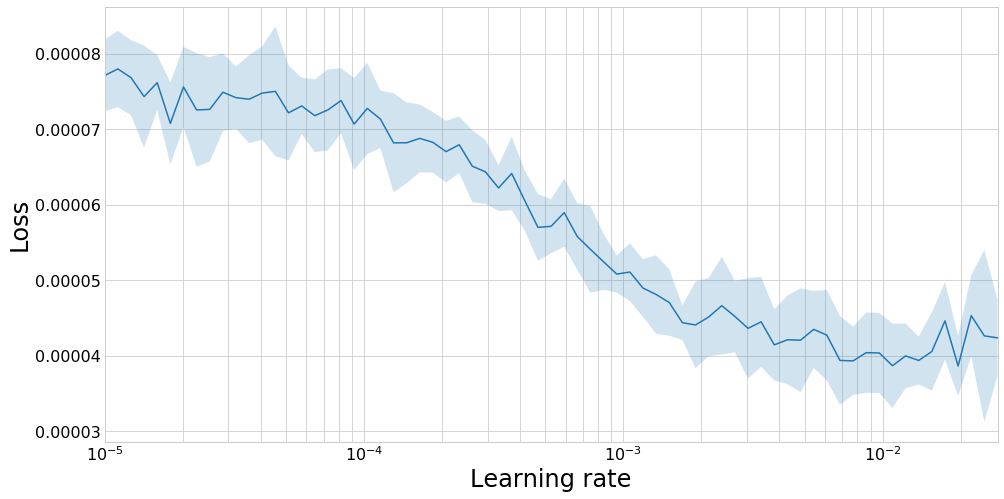

______________________________________



In [7]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [14]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':1, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.229628). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115173). Check your callbacks.
  % delta_t_median)


1 New best found: 3.643150185608155e-05
2 New best found: 3.464948299672636e-05
3 New best found: 3.390069619201073e-05
4 New best found: 3.363637968138501e-05
5 New best found: 3.3366764973922266e-05
6 New best found: 3.305822563218152e-05
7 New best found: 3.290971640663629e-05
8 New best found: 3.258837072405452e-05
10 New best found: 3.24763341095158e-05
11 New best found: 3.229819686189303e-05
12 New best found: 3.223688554487581e-05
14 New best found: 3.220627415044347e-05
15 New best found: 3.1996962324768466e-05
19 New best found: 3.1990703994187134e-05
20 New best found: 3.189404040639222e-05
22 New best found: 3.187866428060922e-05
24 New best found: 3.1852844443490386e-05
29 New best found: 3.17831968925679e-05
32 New best found: 3.177188245289502e-05
34 New best found: 3.174287393981122e-05
35 New best found: 3.166292994930479e-05
38 New best found: 3.158609732448511e-05
45 New best found: 3.157294141600642e-05
51 New best found: 3.153346430814641e-05
52 New best found: 3.1

323 New best found: 3.1247694770184303e-05
324 New best found: 3.1247672091066985e-05
326 New best found: 3.1247652474792776e-05
327 New best found: 3.12476456657464e-05
328 New best found: 3.124763545754258e-05
329 New best found: 3.124762682996152e-05
330 New best found: 3.124761643022769e-05
332 New best found: 3.124761426592042e-05
333 New best found: 3.124759967999179e-05
335 New best found: 3.124759446575558e-05
336 New best found: 3.1247589311361124e-05
337 New best found: 3.124757940509445e-05
338 New best found: 3.124757084826854e-05
339 New best found: 3.124756457015862e-05
341 New best found: 3.1247562653767206e-05
342 New best found: 3.124755581161687e-05
343 New best found: 3.124755561754041e-05
344 New best found: 3.124755017976157e-05
345 New best found: 3.124754700141841e-05
346 New best found: 3.124754363554681e-05
347 New best found: 3.124753996628295e-05
348 New best found: 3.1247535836474e-05
350 New best found: 3.124753479460896e-05
351 New best found: 3.1247531255

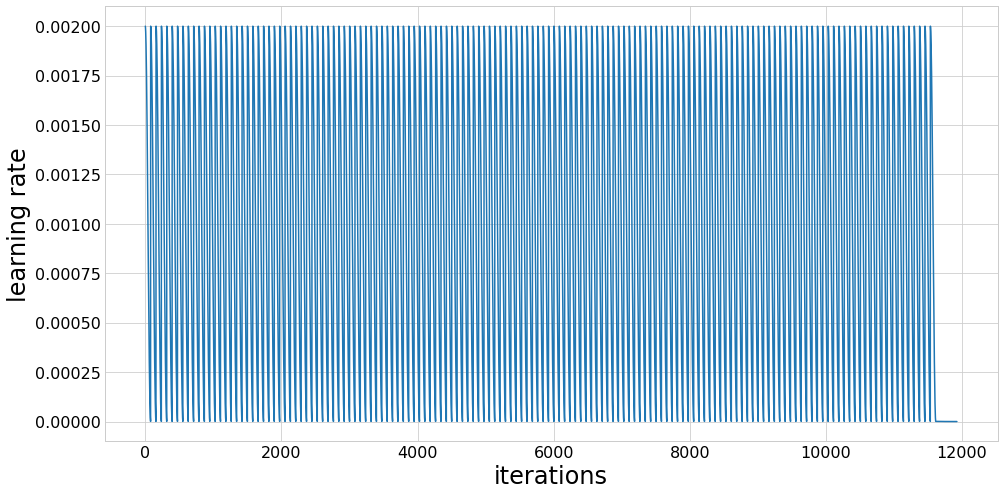

Fold took 376.761s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.297538). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149158). Check your callbacks.
  % delta_t_median)


1 New best found: 3.790479496383341e-05
2 New best found: 3.549105741694802e-05
3 New best found: 3.491620470158523e-05
4 New best found: 3.4134459705092015e-05
6 New best found: 3.381353766308166e-05
7 New best found: 3.357907195168082e-05
8 New best found: 3.3432222402188924e-05
9 New best found: 3.331320654542651e-05
10 New best found: 3.3207528699131217e-05
11 New best found: 3.3004679731675424e-05
13 New best found: 3.280146297765896e-05
18 New best found: 3.279066270770272e-05
20 New best found: 3.275266790005844e-05
21 New best found: 3.259794079203857e-05
22 New best found: 3.2539417843509e-05
30 New best found: 3.251049728496582e-05
31 New best found: 3.24010400698171e-05
36 New best found: 3.230739976570476e-05
38 New best found: 3.229470871156082e-05
40 New best found: 3.221297267591581e-05
55 New best found: 3.218354755008477e-05
73 New best found: 3.209790310647804e-05
CosineAnneal stalling after 123 epochs, entering redux decay at LR=7.906028102497735e-07
124 New best fou

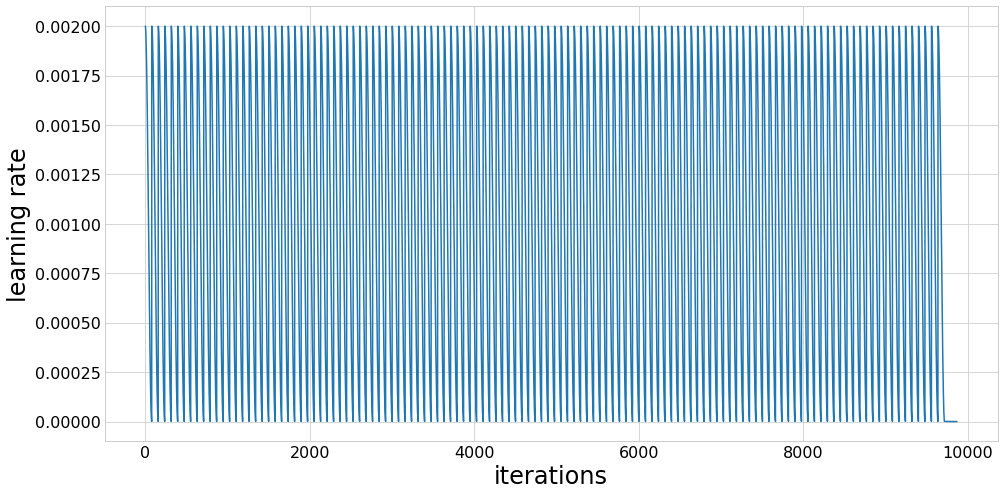

Fold took 236.955s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.281875). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141341). Check your callbacks.
  % delta_t_median)


1 New best found: 3.76492234505786e-05
2 New best found: 3.529047539823523e-05
3 New best found: 3.4458633911374945e-05
4 New best found: 3.388187827145568e-05
5 New best found: 3.333110318224114e-05
7 New best found: 3.3216798575734696e-05
8 New best found: 3.3062477500355035e-05
9 New best found: 3.282669526093472e-05
10 New best found: 3.280405568369417e-05
12 New best found: 3.255509801496422e-05
15 New best found: 3.245429091722302e-05
16 New best found: 3.241312028797661e-05
18 New best found: 3.2371155898741344e-05
22 New best found: 3.221312058961554e-05
23 New best found: 3.216180356662297e-05
27 New best found: 3.215774602857352e-05
31 New best found: 3.2014327315625405e-05
45 New best found: 3.1989510118289306e-05
56 New best found: 3.193148763075179e-05
72 New best found: 3.190710117263497e-05
74 New best found: 3.188944316532632e-05
75 New best found: 3.1808442935237903e-05
94 New best found: 3.1711718356340025e-05
103 New best found: 3.168728689954145e-05
CosineAnneal sta

334 New best found: 3.161293658792449e-05
335 New best found: 3.161290650815743e-05
336 New best found: 3.16128954029447e-05
337 New best found: 3.161288704672622e-05
339 New best found: 3.1612847613793676e-05
340 New best found: 3.161277722547974e-05
341 New best found: 3.1612757239061936e-05
342 New best found: 3.1612743178025543e-05
343 New best found: 3.1612717909998886e-05
344 New best found: 3.161270181586733e-05
345 New best found: 3.16126823222384e-05
346 New best found: 3.161267514023629e-05
348 New best found: 3.161263441630241e-05
349 New best found: 3.1612578548979335e-05
350 New best found: 3.161256422053813e-05
351 New best found: 3.161255496887734e-05
352 New best found: 3.161254915773418e-05
353 New best found: 3.161252485973212e-05
354 New best found: 3.1612511576443535e-05
355 New best found: 3.161249942125763e-05
357 New best found: 3.16124678992327e-05
358 New best found: 3.161243271703618e-05
359 New best found: 3.161241876923754e-05
360 New best found: 3.161240710

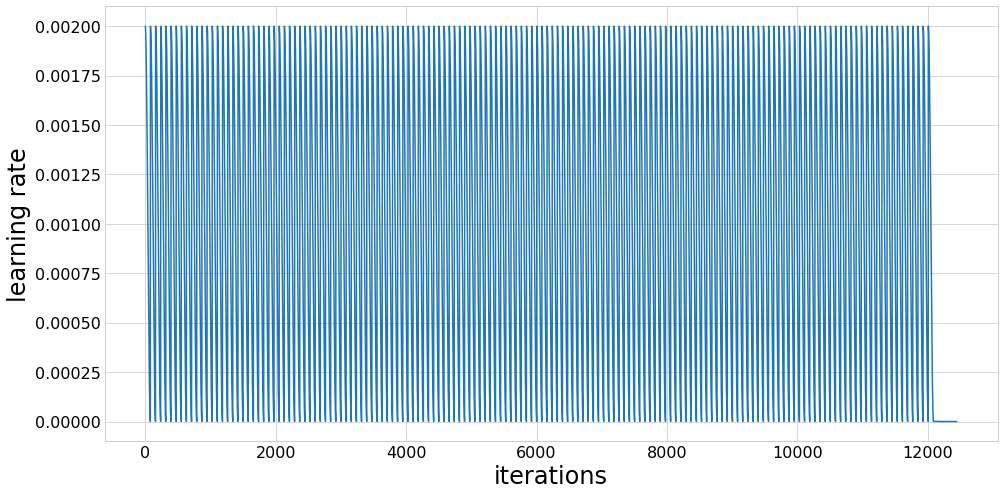

Fold took 445.083s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.302518). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.151589). Check your callbacks.
  % delta_t_median)


1 New best found: 3.6743462477170394e-05
2 New best found: 3.50699032904231e-05
3 New best found: 3.465990580007201e-05
4 New best found: 3.420545323460829e-05
5 New best found: 3.392255673679756e-05
6 New best found: 3.382395603694022e-05
7 New best found: 3.3772023429628464e-05
8 New best found: 3.3265811981982554e-05
11 New best found: 3.305074106610846e-05
13 New best found: 3.297900458419463e-05
14 New best found: 3.2977439652313477e-05
15 New best found: 3.287389357428765e-05
18 New best found: 3.277339518826921e-05
19 New best found: 3.263911381800426e-05
22 New best found: 3.258297498250613e-05
23 New best found: 3.252501816459699e-05
26 New best found: 3.2523732705158184e-05
32 New best found: 3.2464324438478795e-05
33 New best found: 3.2435324534890244e-05
35 New best found: 3.238267043489031e-05
37 New best found: 3.226178857294144e-05
58 New best found: 3.215572687913664e-05
CosineAnneal stalling after 108 epochs, entering redux decay at LR=7.906028102497735e-07
109 New bes

307 New best found: 3.2129670554422776e-05
308 New best found: 3.2129670371068644e-05
310 New best found: 3.2129670334688857e-05
311 New best found: 3.2129670282301956e-05
312 New best found: 3.212967012805166e-05
315 New best found: 3.212967012223089e-05
316 New best found: 3.212966997089097e-05
317 New best found: 3.2129669925780035e-05
319 New best found: 3.21296698806691e-05
Early stopping after 329 epochs
Score is: {'loss': 3.21296698806691e-05, 'wAUC': 0.0645717479696073, 'AUC': 0.10076434758796982, 'AMS': 3.830286693314964, 'cut': 0.9648342728614807}


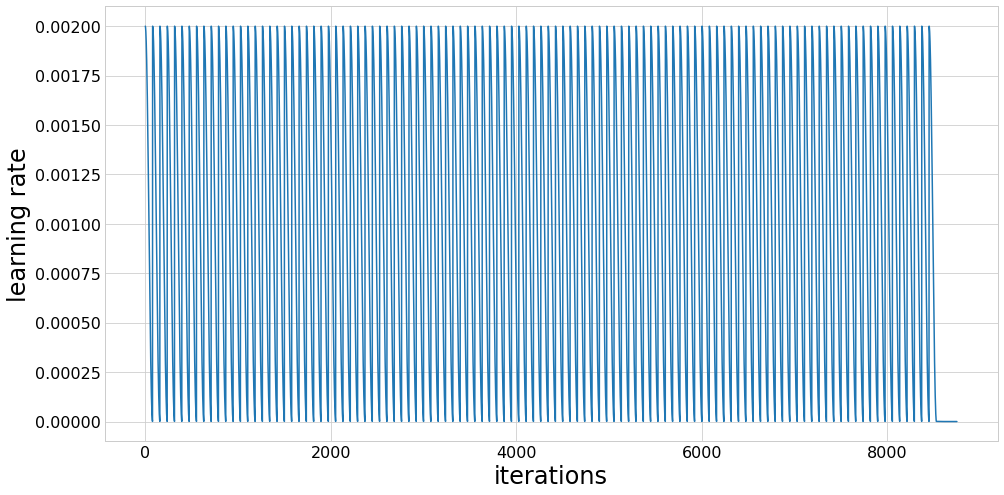

Fold took 292.851s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.316796). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.158761). Check your callbacks.
  % delta_t_median)


1 New best found: 3.640452189283678e-05
2 New best found: 3.476772690191865e-05
3 New best found: 3.377572564786533e-05
4 New best found: 3.352992700820323e-05
5 New best found: 3.2959392365592064e-05
6 New best found: 3.294575839536265e-05
8 New best found: 3.257597165647894e-05
9 New best found: 3.224976013734704e-05
11 New best found: 3.208185684488853e-05
12 New best found: 3.2054997788509356e-05
14 New best found: 3.188167579937726e-05
17 New best found: 3.1854793647653426e-05
18 New best found: 3.1786722816468684e-05
20 New best found: 3.174121507472591e-05
21 New best found: 3.1684959575068205e-05
23 New best found: 3.1628911226289346e-05
24 New best found: 3.157870557915885e-05
27 New best found: 3.155391464388231e-05
29 New best found: 3.152772682806244e-05
32 New best found: 3.134074122644961e-05
44 New best found: 3.131697044154862e-05
53 New best found: 3.1285567411396185e-05
59 New best found: 3.122188928537071e-05
71 New best found: 3.1200929376063866e-05
77 New best foun

303 New best found: 3.108326733636204e-05
304 New best found: 3.1083249967196024e-05
305 New best found: 3.108319716993719e-05
306 New best found: 3.108304669003701e-05
307 New best found: 3.108295524289133e-05
308 New best found: 3.108292205579346e-05
309 New best found: 3.1082897371379656e-05
310 New best found: 3.108286743663484e-05
312 New best found: 3.1082778773270546e-05
313 New best found: 3.108273134566844e-05
314 New best found: 3.108267953939503e-05
315 New best found: 3.108257052081172e-05
316 New best found: 3.108250985096674e-05
317 New best found: 3.108248759817798e-05
318 New best found: 3.108247201453196e-05
319 New best found: 3.1082457437878475e-05
320 New best found: 3.108245506591629e-05
321 New best found: 3.108237344276858e-05
322 New best found: 3.10823443956906e-05
323 New best found: 3.108230302023003e-05
324 New best found: 3.108218704146566e-05
325 New best found: 3.108212886727415e-05
326 New best found: 3.1082103130756876e-05
327 New best found: 3.10820714

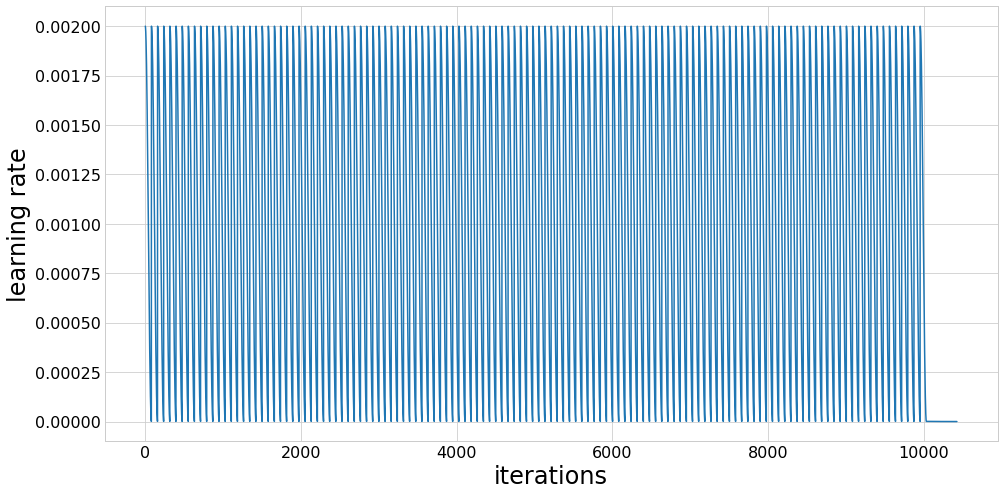

Fold took 471.206s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.344811). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172802). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7562004300707486e-05
2 New best found: 3.543815534794703e-05
3 New best found: 3.4713031438877805e-05
4 New best found: 3.3995019021676855e-05
5 New best found: 3.3739308499207256e-05
7 New best found: 3.328572078171419e-05
8 New best found: 3.3155507032643075e-05
10 New best found: 3.300685954891378e-05
11 New best found: 3.2844821037724617e-05
13 New best found: 3.280164183670422e-05
14 New best found: 3.2717588158266155e-05
15 New best found: 3.249395200546132e-05
16 New best found: 3.240633568202611e-05
19 New best found: 3.225710941915168e-05
23 New best found: 3.2182916038436814e-05
24 New best found: 3.21172196752741e-05
28 New best found: 3.195493248204002e-05
33 New best found: 3.193676302471431e-05
42 New best found: 3.1850065318576524e-05
51 New best found: 3.174566876987228e-05
60 New best found: 3.16765046081855e-05
74 New best found: 3.166043495730264e-05
83 New best found: 3.1620047619799155e-05
CosineAnneal stalling after 133 epochs, entering redux d

327 New best found: 3.15603583745542e-05
328 New best found: 3.1560358115530105e-05
329 New best found: 3.1560357197304256e-05
330 New best found: 3.1560356040426995e-05
331 New best found: 3.156035526335472e-05
332 New best found: 3.156035514839459e-05
334 New best found: 3.1560355007241014e-05
335 New best found: 3.156035475403769e-05
336 New best found: 3.156035439315019e-05
337 New best found: 3.156035429565236e-05
338 New best found: 3.156035327992868e-05
339 New best found: 3.156035249994602e-05
340 New best found: 3.1560352076485285e-05
341 New best found: 3.156035171559779e-05
343 New best found: 3.156035157298902e-05
344 New best found: 3.156035156571306e-05
345 New best found: 3.156035127904033e-05
346 New best found: 3.156035118008731e-05
347 New best found: 3.156035065621836e-05
348 New best found: 3.156035001011332e-05
349 New best found: 3.156034972926136e-05
350 New best found: 3.156034965068102e-05
351 New best found: 3.15603494993411e-05
352 New best found: 3.156034931

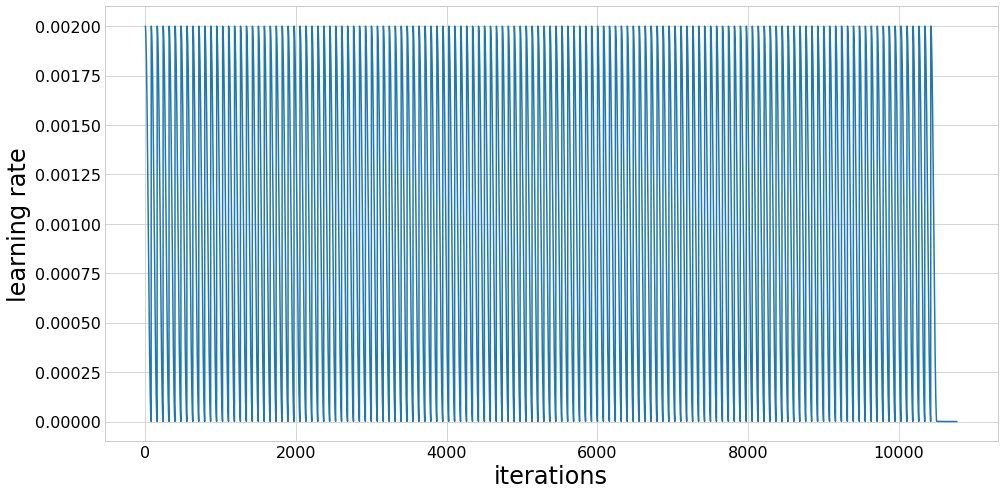

Fold took 370.329s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.378240). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189506). Check your callbacks.
  % delta_t_median)


1 New best found: 3.746210282636316e-05
2 New best found: 3.6182170325297554e-05
3 New best found: 3.533969818256486e-05
4 New best found: 3.458779079357298e-05
5 New best found: 3.4163313500228325e-05
6 New best found: 3.384567336939749e-05
8 New best found: 3.361994326195183e-05
9 New best found: 3.349814516295638e-05
10 New best found: 3.341005990496455e-05
12 New best found: 3.3196007918828515e-05
14 New best found: 3.299118431409261e-05
17 New best found: 3.298759387375701e-05
19 New best found: 3.295857628846811e-05
21 New best found: 3.286392449526582e-05
22 New best found: 3.283738283051046e-05
30 New best found: 3.280862489225181e-05
31 New best found: 3.2770319031920835e-05
32 New best found: 3.276858605134343e-05
33 New best found: 3.2722090091301514e-05
41 New best found: 3.268248364526817e-05
45 New best found: 3.263136018190891e-05
54 New best found: 3.26032313169464e-05
57 New best found: 3.2601151268339734e-05
58 New best found: 3.254568051283251e-05
68 New best found: 

300 New best found: 3.243626748159692e-05
301 New best found: 3.243622092688803e-05
303 New best found: 3.243621125022318e-05
304 New best found: 3.243619626946569e-05
305 New best found: 3.24361886046418e-05
306 New best found: 3.2436163144570836e-05
307 New best found: 3.243614452821901e-05
308 New best found: 3.2436127782695184e-05
309 New best found: 3.243612136701402e-05
310 New best found: 3.2436097166163617e-05
312 New best found: 3.243608059140025e-05
313 New best found: 3.24360701238613e-05
314 New best found: 3.243606897281973e-05
315 New best found: 3.243604600075176e-05
316 New best found: 3.243602242223178e-05
317 New best found: 3.243601107287096e-05
318 New best found: 3.243600903449967e-05
319 New best found: 3.243598950015831e-05
320 New best found: 3.24359891177548e-05
321 New best found: 3.243598350638769e-05
322 New best found: 3.2435967154007404e-05
323 New best found: 3.243596469969382e-05
324 New best found: 3.243593631057678e-05
325 New best found: 3.24359194774

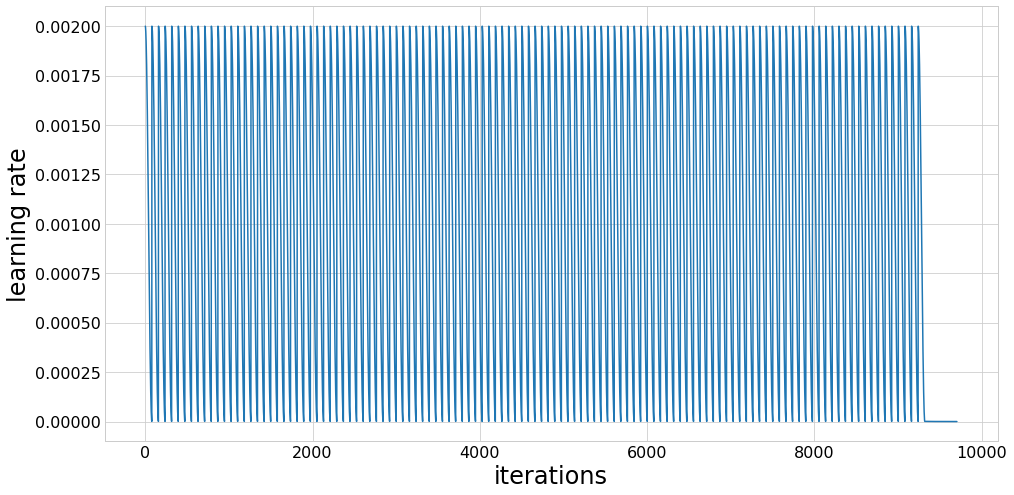

Fold took 477.681s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.411660). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.206250). Check your callbacks.
  % delta_t_median)


1 New best found: 3.658917410513729e-05
2 New best found: 3.4805025108008124e-05
3 New best found: 3.420416507766373e-05
4 New best found: 3.3817063480206055e-05
5 New best found: 3.3492131085020765e-05
7 New best found: 3.3200543407089055e-05
8 New best found: 3.299554310412112e-05
9 New best found: 3.252744192453146e-05
12 New best found: 3.243573421054498e-05
15 New best found: 3.238510807218027e-05
17 New best found: 3.2293514966441184e-05
18 New best found: 3.2128073323756214e-05
25 New best found: 3.2120494912744403e-05
26 New best found: 3.2077769161068575e-05
27 New best found: 3.18124764357776e-05
45 New best found: 3.173500912960415e-05
65 New best found: 3.163278466056696e-05
CosineAnneal stalling after 115 epochs, entering redux decay at LR=7.906028102497735e-07
116 New best found: 3.163124560843915e-05
117 New best found: 3.162866739365065e-05
118 New best found: 3.162690334183821e-05
119 New best found: 3.1625835642081556e-05
120 New best found: 3.162468520190961e-05
121 

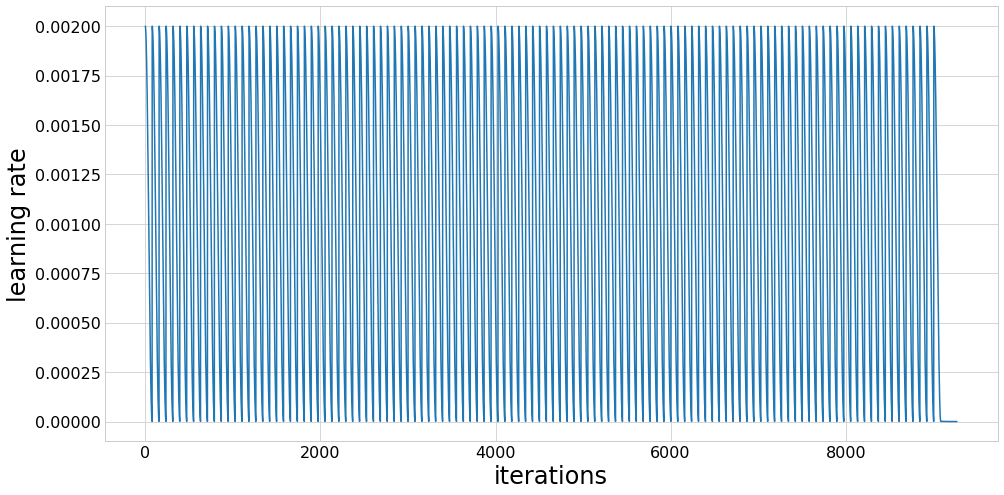

Fold took 291.024s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.410661). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.205715). Check your callbacks.
  % delta_t_median)


1 New best found: 3.725161568239759e-05
2 New best found: 3.541993159500038e-05
3 New best found: 3.4652715281395745e-05
4 New best found: 3.434837337975745e-05
5 New best found: 3.3711162369354e-05
6 New best found: 3.370895555520551e-05
7 New best found: 3.347666071775992e-05
8 New best found: 3.3356066663502433e-05
9 New best found: 3.317655979088228e-05
10 New best found: 3.306557733661699e-05
11 New best found: 3.2990486819796186e-05
14 New best found: 3.284000230653909e-05
15 New best found: 3.27106759782241e-05
19 New best found: 3.268877868429121e-05
20 New best found: 3.2512463432199574e-05
21 New best found: 3.244871548238374e-05
38 New best found: 3.2411585237805705e-05
39 New best found: 3.2345530121905286e-05
44 New best found: 3.22896240234936e-05
65 New best found: 3.2285420656516205e-05
66 New best found: 3.225136046359733e-05
75 New best found: 3.224899472741359e-05
CosineAnneal stalling after 125 epochs, entering redux decay at LR=7.906028102497735e-07
126 New best fo

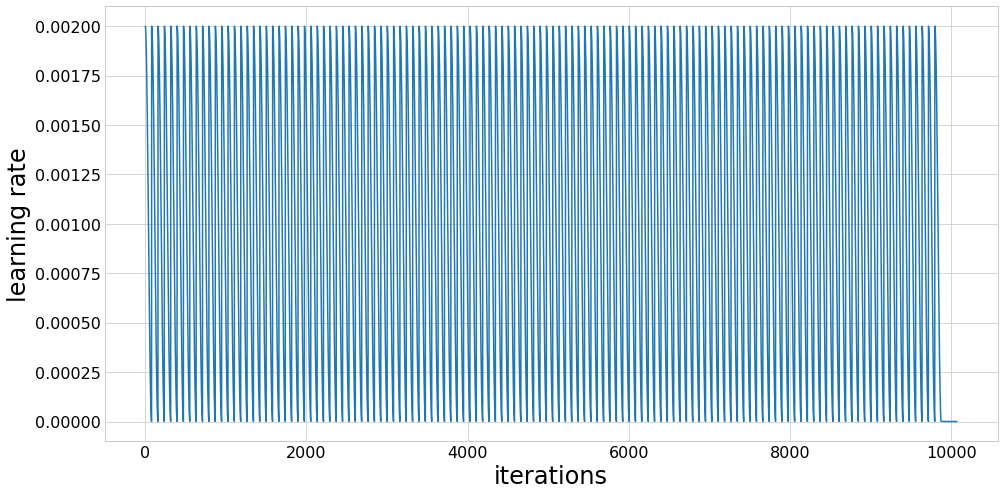

Fold took 317.408s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.458662). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.229765). Check your callbacks.
  % delta_t_median)


1 New best found: 3.779923723763495e-05
2 New best found: 3.566866699466609e-05
3 New best found: 3.478248798592101e-05
4 New best found: 3.441288989891242e-05
5 New best found: 3.412338377235013e-05
6 New best found: 3.385096716738244e-05
7 New best found: 3.360185085938313e-05
9 New best found: 3.3251971611181624e-05
12 New best found: 3.306791090338013e-05
16 New best found: 3.286246593840664e-05
18 New best found: 3.285519586442596e-05
21 New best found: 3.279932351922946e-05
25 New best found: 3.264913159745575e-05
27 New best found: 3.263089685481266e-05
34 New best found: 3.2579434202158685e-05
36 New best found: 3.252701197106394e-05
45 New best found: 3.251188441385939e-05
47 New best found: 3.2487122875106895e-05
54 New best found: 3.246926442233315e-05
81 New best found: 3.235211596227981e-05
CosineAnneal stalling after 131 epochs, entering redux decay at LR=7.906028102497735e-07
132 New best found: 3.235011606960954e-05
133 New best found: 3.2347954518542244e-05
134 New bes

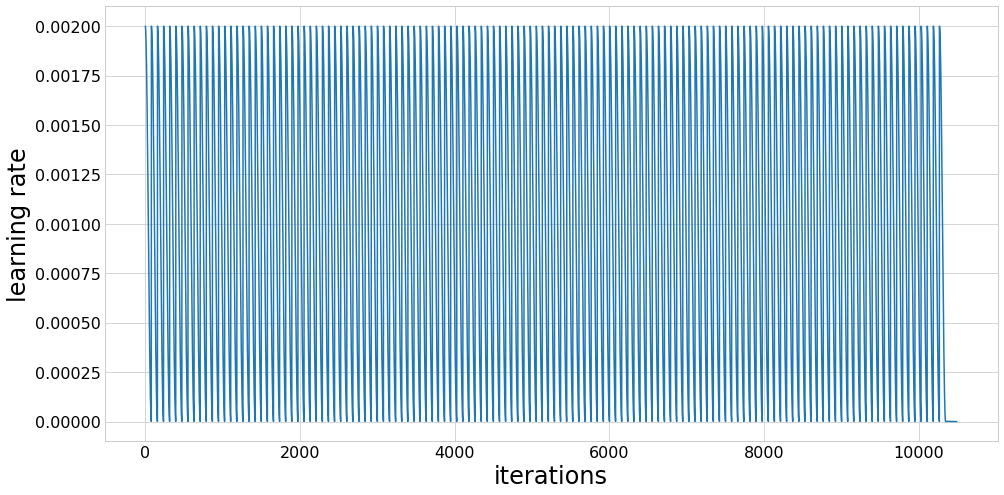

Fold took 280.727s


______________________________________
Training finished
Cross-validation took 3563.126s 


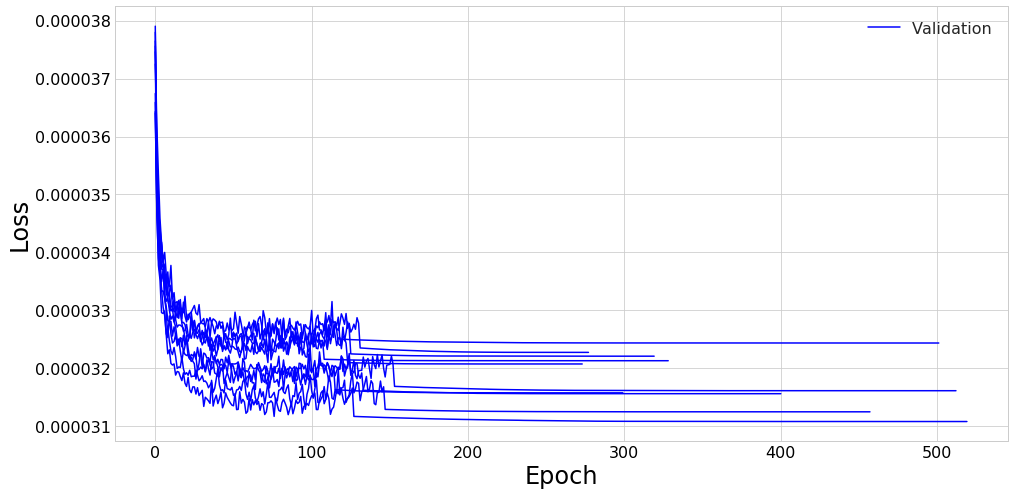

Mean loss = 3.18e-05 +- 1e-07
Mean wAUC = 0.0635 +- 0.0005
Mean AUC = 0.1 +- 0.001
Mean AMS = 3.81 +- 0.05
Mean cut = 0.955 +- 0.006
______________________________________



<Figure size 432x288 with 0 Axes>

In [15]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [16]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [17]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 4 with loss = 3.107973297737772e-05
Model 1 is 0 with loss = 3.124746136440496e-05
Model 2 is 5 with loss = 3.1560343579621984e-05
Model 3 is 7 with loss = 3.1575140493538185e-05
Model 4 is 2 with loss = 3.16118220211996e-05
Model 5 is 1 with loss = 3.207349579897709e-05
Model 6 is 3 with loss = 3.21296698806691e-05
Model 7 is 8 with loss = 3.2207861644456724e-05
Model 8 is 9 with loss = 3.227351555886463e-05
Model 9 is 6 with loss = 3.2435275258931266e-05


## Response on validation data

In [18]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [19]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.001883476184681058s per sample

Predicting fold 2 out of 10
Prediction took 0.0003991184148937464s per sample

Predicting fold 3 out of 10
Prediction took 0.0003942044980823994s per sample

Predicting fold 4 out of 10
Prediction took 0.0003952213820070028s per sample

Predicting fold 5 out of 10
Prediction took 0.00039491456411778927s per sample

Predicting fold 6 out of 10
Prediction took 0.0003926677715033293s per sample

Predicting fold 7 out of 10
Prediction took 0.00040138740837574003s per sample

Predicting fold 8 out of 10
Prediction took 0.0003952311173081398s per sample

Predicting fold 9 out of 10
Prediction took 0.00041085352897644043s per sample

Predicting fold 10 out of 10
Prediction took 0.0003934897918254137s per sample



In [20]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9033307363390811, weighted 0.9361174651204669


In [21]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.890204554222837, 0.9656764)

In [22]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.96+-0.02
Exact mean cut 0.9588005816331133, corresponds to calc_ams of 3.848341475528808
CPU times: user 2.6 s, sys: 9.48 s, total: 12.1 s
Wall time: 4min 1s


(4.0, 0.96)

# Test scoring

In [23]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [24]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0004142429280687462s per sample

Predicting fold 2 out of 10
Prediction took 0.00040465927083383906s per sample

Predicting fold 3 out of 10
Prediction took 0.0004128775009038773s per sample

Predicting fold 4 out of 10
Prediction took 0.0004087125793776729s per sample

Predicting fold 5 out of 10
Prediction took 0.0004144978325136683s per sample

Predicting fold 6 out of 10
Prediction took 0.00040430408668788996s per sample

Predicting fold 7 out of 10
Prediction took 0.00040543779094110837s per sample

Predicting fold 8 out of 10
Prediction took 0.0004047214503315362s per sample

Predicting fold 9 out of 10
Prediction took 0.00040939926769245757s per sample

Predicting fold 10 out of 10
Prediction took 0.0004054143550721082s per sample

CPU times: user 4min 1s, sys: 5.63 s, total: 4min 7s
Wall time: 3min 44s


In [25]:
score_test_data(test_fy.source, 0.9588005816331133)

Public:Private AMS: 3.7042613465674257 : 3.7494748955555166


(3.7042613465674257, 3.7494748955555166)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)